In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
import pickle
warnings.filterwarnings("ignore")

## Классификация

In [ ]:
data = pd.read_csv("smoke_detector_task.csv")
data.head(20)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.0,0.000,0.000,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.0,0.000,0.000,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.0,0.000,0.000,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.0,0.000,0.000,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.0,0.000,0.000,4,No
5,5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.00,0.00,0.0,0.000,0.000,5,No
6,6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.00,0.00,0.0,0.000,0.000,6,No
7,7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.00,0.00,0.0,0.000,0.000,7,No
8,8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.00,0.00,0.0,0.000,0.000,8,No
9,9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.90,3.78,0.0,4.369,2.780,9,No


In [ ]:
del data['Unnamed: 0']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62484 non-null  float64
 2   Humidity[%]     62383 non-null  float64
 3   TVOC[ppb]       62009 non-null  float64
 4   eCO2[ppm]       62305 non-null  float64
 5   Raw H2          62519 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62603 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62313 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62378 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.2+ MB


In [ ]:
data.isna().sum()

UTC                 0
Temperature[C]    146
Humidity[%]       247
TVOC[ppb]         621
eCO2[ppm]         325
Raw H2            111
Raw Ethanol         0
Pressure[hPa]      27
PM1.0               0
PM2.5             317
NC0.5               0
NC1.0             252
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

In [ ]:
columns_to_replace=['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5','CNT']
for column in columns_to_replace:
  data[column] = data[column].fillna(data[column].median())

In [ ]:
data['Fire Alarm']=data['Fire Alarm'].fillna('unknown')

In [ ]:
data.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [ ]:
data['CNT'] = data['CNT'].astype(int)


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  float64
 4   eCO2[ppm]       62630 non-null  float64
 5   Raw H2          62630 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.2+ MB


In [ ]:
data.head(10)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,No
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,No
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,No
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,No
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,No
5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,No
6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,No
7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,No
8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,No
9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,No


In [ ]:
def output_of_the_results_matrix(y_test, y_pred):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False);
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Фактические классы')
    plt.title('Матрица ошибок')
    plt.show()

## EDA

Основные параметры:
 1   Temperature[C]  
 2   Humidity[%]     
 3   TVOC[ppb]       
 4   eCO2[ppm]       
 5   Raw H2          
 6   Raw Ethanol     
 7   Pressure[hPa]   
 8   PM1.0           
 9   PM2.5           
 10  NC0.5           
 11  NC1.0           
 12  NC2.5          
 13  CNT   


<Axes: ylabel='Temperature[C]'>

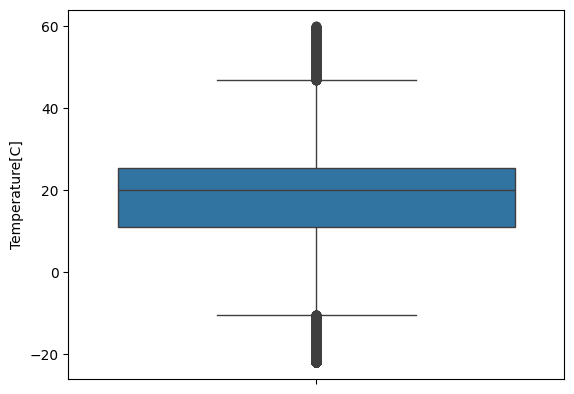

In [ ]:
sns.boxplot(y='Temperature[C]',data=data)

<Axes: ylabel='Humidity[%]'>

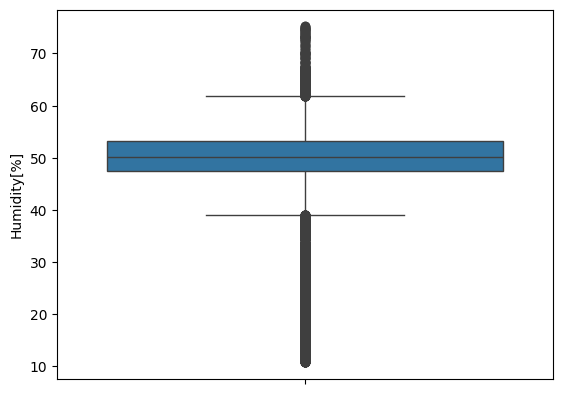

In [ ]:
sns.boxplot(y='Humidity[%]',data=data)

<Axes: ylabel='TVOC[ppb]'>

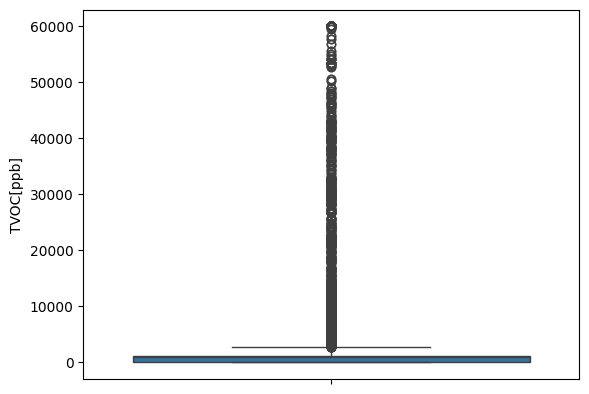

In [ ]:
sns.boxplot(y='TVOC[ppb]',data=data)

<Axes: ylabel='eCO2[ppm]'>

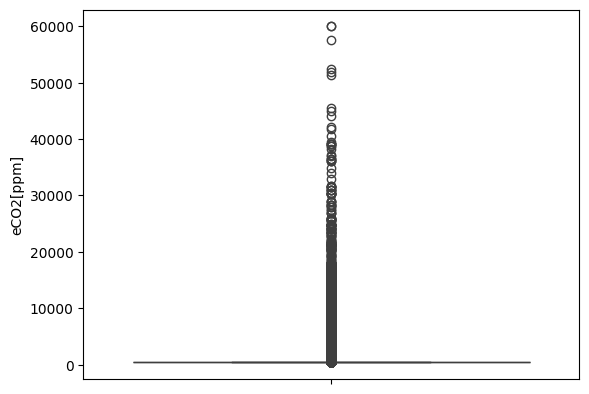

In [ ]:
sns.boxplot(y='eCO2[ppm]',data=data)

<Axes: ylabel='Raw H2'>

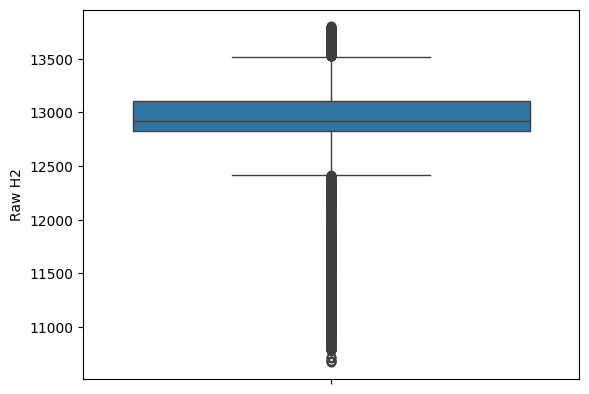

In [ ]:
sns.boxplot(y='Raw H2',data=data)

<Axes: ylabel='Raw Ethanol'>

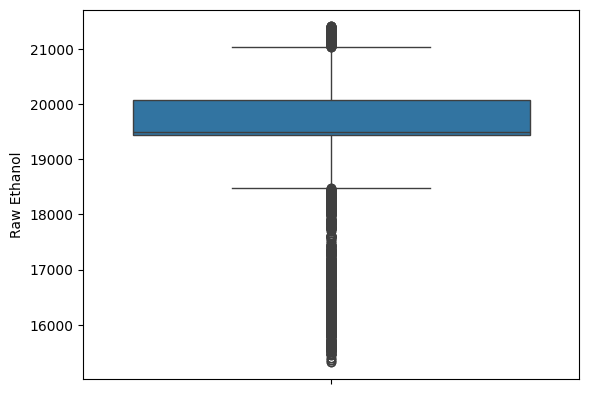

In [ ]:
sns.boxplot(y='Raw Ethanol',data=data)

<Axes: ylabel='Pressure[hPa]'>

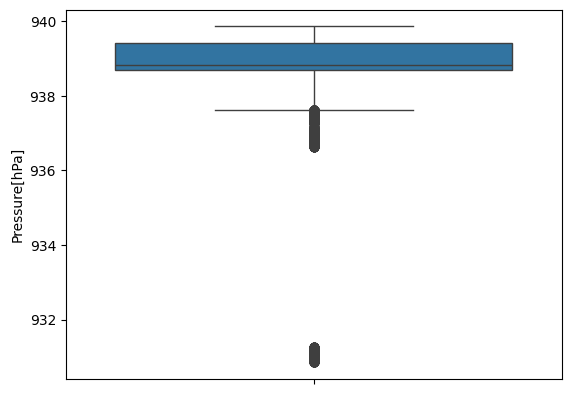

In [ ]:
sns.boxplot(y='Pressure[hPa]',data=data)

<Axes: ylabel='PM1.0'>

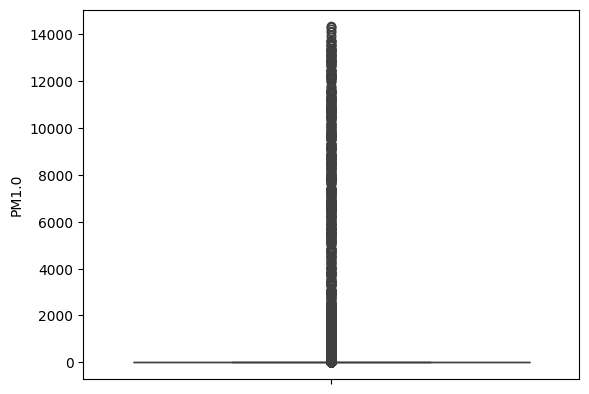

In [ ]:
sns.boxplot(y='PM1.0',data=data)

<Axes: ylabel='PM2.5'>

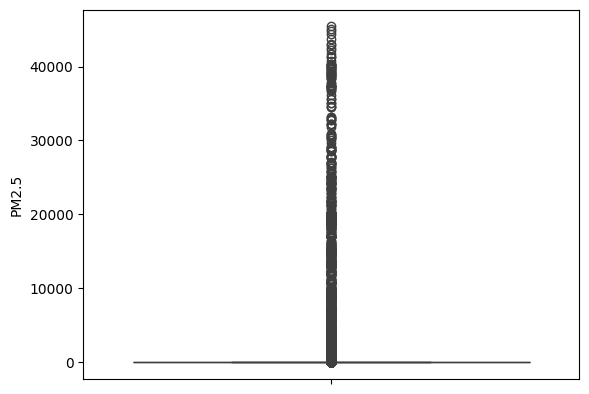

In [ ]:
sns.boxplot(y='PM2.5',data=data)

<Axes: ylabel='NC0.5'>

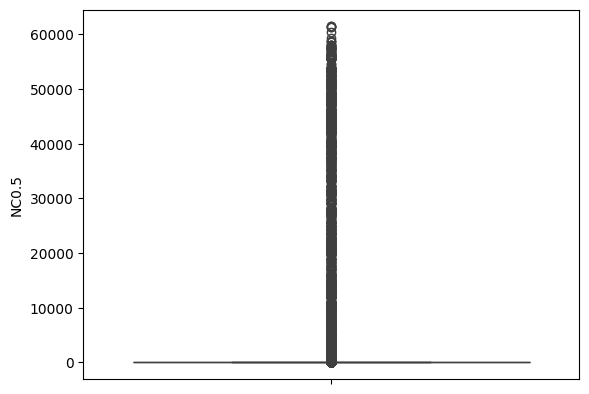

In [ ]:
sns.boxplot(y='NC0.5',data=data)

<Axes: ylabel='NC1.0'>

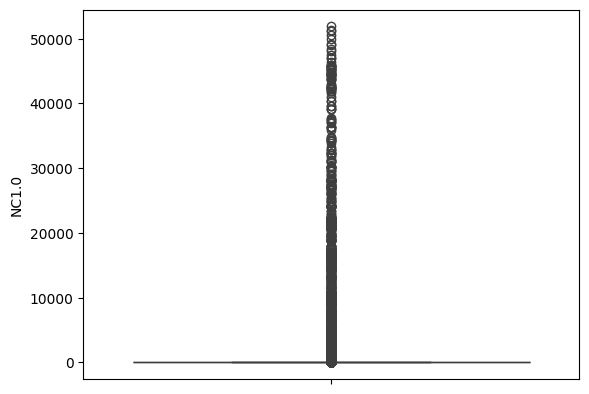

In [ ]:
sns.boxplot(y='NC1.0',data=data)

<Axes: ylabel='NC2.5'>

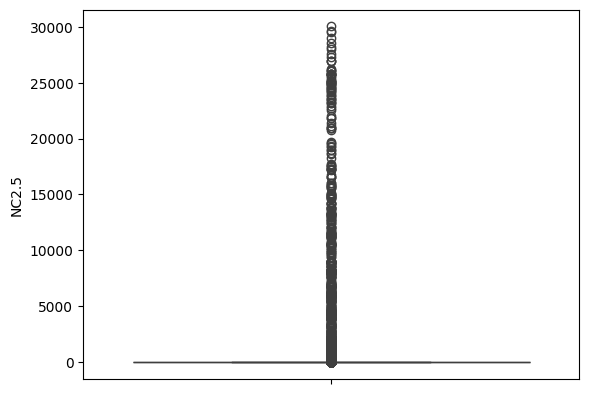

In [ ]:
sns.boxplot(y='NC2.5',data=data)

<Axes: ylabel='CNT'>

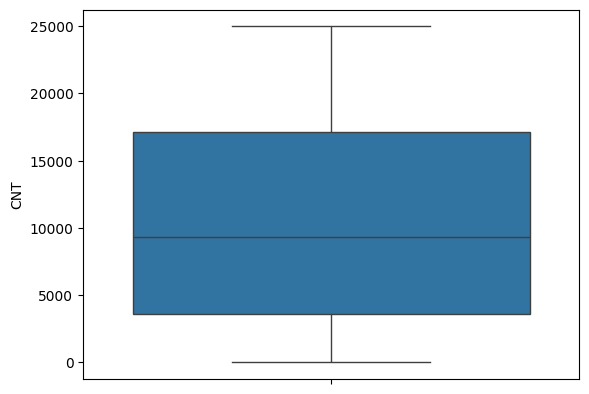

In [ ]:
sns.boxplot(y='CNT',data=data)

В нашем датасете очень много выбросов, но при их удалении мы теряем очень важную информацию


<function matplotlib.pyplot.show(close=None, block=None)>

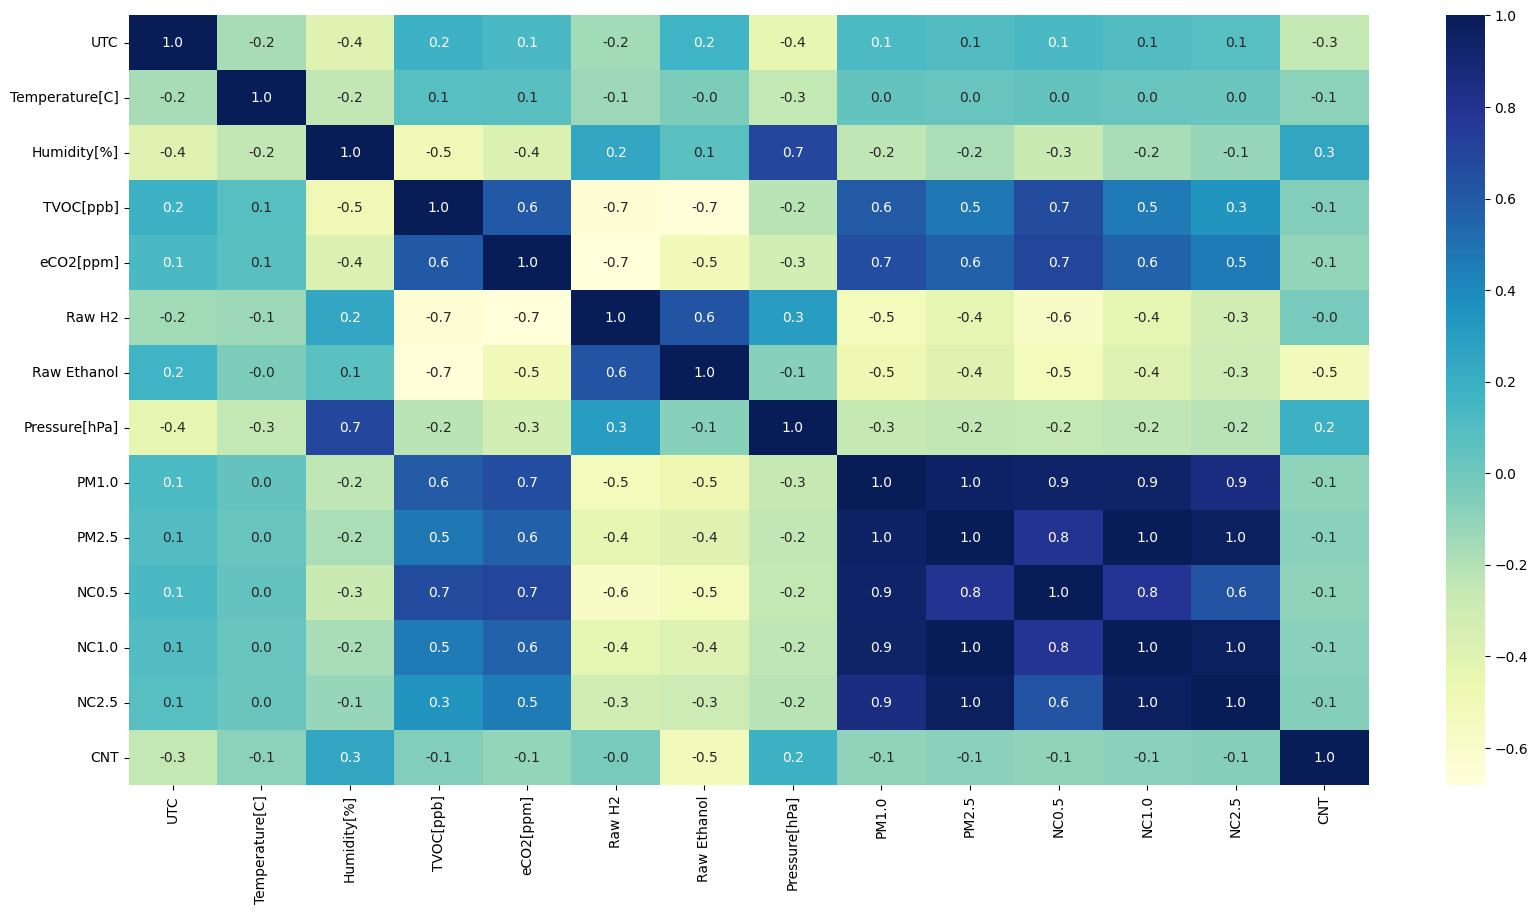

In [ ]:
correlation_matrix= data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".1f")
plt.show

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  float64
 4   eCO2[ppm]       62630 non-null  float64
 5   Raw H2          62630 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.2+ MB


In [ ]:
data.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data= pd.get_dummies(data, columns=['Fire Alarm'], drop_first=True)
#Преобразование категориальных признаков

In [ ]:
data.head(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm_Yes
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## Дисбаланс классов


In [ ]:
tran = data[data['Fire Alarm_Yes']==1]
not_tran = data[data['Fire Alarm_Yes']==0]

In [ ]:
from sklearn.utils import resample
not_downsample = resample(not_tran,
             replace=True,
             n_samples=len(tran),
             random_state=42)

In [ ]:
data_ds = pd.concat([tran, not_downsample])
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89514 entries, 3178 to 51813
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             89514 non-null  int64  
 1   Temperature[C]  89514 non-null  float64
 2   Humidity[%]     89514 non-null  float64
 3   TVOC[ppb]       89514 non-null  float64
 4   eCO2[ppm]       89514 non-null  float64
 5   Raw H2          89514 non-null  float64
 6   Raw Ethanol     89514 non-null  int64  
 7   Pressure[hPa]   89514 non-null  float64
 8   PM1.0           89514 non-null  float64
 9   PM2.5           89514 non-null  float64
 10  NC0.5           89514 non-null  float64
 11  NC1.0           89514 non-null  float64
 12  NC2.5           89514 non-null  float64
 13  CNT             89514 non-null  int64  
 14  Fire Alarm_Yes  89514 non-null  uint8  
dtypes: float64(11), int64(3), uint8(1)
memory usage: 10.3 MB


<Axes: ylabel='Type'>

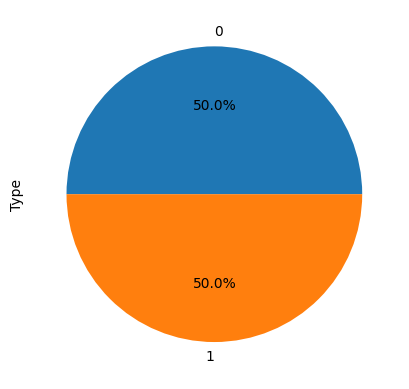

In [ ]:
data_ds.groupby('Fire Alarm_Yes').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
data_ds.to_csv("smoke2.csv",index=False)

## Задача классификации

## Ridge classification

In [ ]:
y = data_ds["Fire Alarm_Yes"]
X = data_ds.drop(["Fire Alarm_Yes","UTC"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
ridge_classifier = RidgeClassifier(alpha=1.0)
ridge_classifier.fit(X_train, y_train)


RidgeClassifier()

In [ ]:
y_pred = ridge_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9092889459867062


Ridge Classification - это метод классификации, основанный на использовании Ridge Regression (линейной регрессии с L2-регуляризацией) в контексте задачи классификации. Этот метод подходит для задач, где требуется разделение данных на два или более класса.

Основная идея Ridge Classification заключается в том, чтобы применить регуляризацию к линейной модели для предотвращения переобучения и улучшения обобщающей способности модели. Регуляризация помогает управлять весами признаков и предотвращает их чрезмерное увеличение, что может быть полезно при наличии мультиколлинеарности в данных.

В Ridge Classification функция потерь минимизируется с учетом суммы квадратов весов, умноженных на коэффициент регуляризации (обычно обозначаемый как alpha или lambda). Этот коэффициент регуляризации позволяет настраивать уровень регуляризации: при увеличении alpha увеличивается сила регуляризации.

Процесс обучения Ridge Classification включает в себя минимизацию функции потерь с учетом как суммы квадратов ошибок, так и регуляризационного члена. Обученная модель может затем использоваться для предсказания классов новых данных.

Обобщенно, Ridge Classification представляет собой комбинацию линейной регрессии и регуляризации, примененной к задаче классификации.

In [ ]:
with open('Ridge.pkl', 'wb') as pickle_out:
    pickle.dump(ridge_classifier, pickle_out)
